# Đồ án cuối kì môn Lập trình cho Khoa học Dữ liệu - CQ2022/21

## IV. Đặt câu hỏi có ý nghĩa và trả lời  <a id="iv"></a>

### 1. Câu hỏi 1 <a id="iv1"></a>

### 2. Câu hỏi 2 <a id="iv2"></a>

### 3. Câu hỏi 3 <a id="iv3"></a>

Câu hỏi: Với mỗi loại Laptop, cấu hình đặc trưng của từng loại là gì? Phân phối giá cả ra sao?
- Lợi ích khi trả lời câu hỏi: Người tiêu dùng có thể cảm nhận rõ hơn đặc trưng của từng loại laptop (Netbook, Notebook, Ultrabook, Gaming, Workstation, Converitble) là gì? Từ đó có thể chọn được 1 loại laptop phù hợp cho riêng bản thân.

In [133]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [134]:
df = pd.read_csv("./Dataset/laptop_price_cleaned.csv", encoding='ISO-8859-1')
df.sample(n=5)

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
766,Asus,X751NV-TY001 (N4200/4GB/1TB/GeForce,Notebook,17,4,Windows 10,2.80,470.34,Standard,1366,...,No,Intel,1.1,Pentium Quad Core N4200,1024,0,HDD,No,Nvidia,GeForce 920MX
896,Dell,Inspiron 7567,Gaming,15,8,Linux,2.62,929.00,Full HD,1920,...,No,Intel,2.8,Core i7 7700HQ,1024,0,HDD,No,Nvidia,GeForce GTX 1050Ti
1270,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13,16,Windows 10,1.30,1499.00,Quad HD+,3200,...,No,Intel,2.5,Core i7 6500U,512,0,SSD,No,Intel,HD Graphics 520
258,MSI,GT73EVR 7RE,Gaming,17,16,Windows 10,4.14,2499.00,Full HD,1920,...,No,Intel,2.8,Core i7 7700HQ,512,1024,SSD,HDD,Nvidia,GeForce GTX 1070
425,Dell,Inspiron 7577,Gaming,15,8,Windows 10,2.62,1159.00,Full HD,1920,...,No,Intel,2.8,Core i7 7700HQ,128,1024,SSD,HDD,Nvidia,GeForce GTX 1050 Ti


Với laptop `2 in 1 Convertible`: Đây là loại laptop có thể vừa sử dụng như 1 table hoặc laptop. Ta có thể thấy được loại laptop này bắt bụôc phải sử dụng màn hình cảm ứng. 

In [135]:
df[(df['TypeName'] == '2 in 1 Convertible') & (df['Touchscreen'] == 'No')]

,Company,Product,TypeName,Inches,Ram,OpSys,Weight,Price_euros,Screen,ScreenW,...,RetinaDisplay,CPU_company,CPU_freq,CPU_model,PrimaryStorage,SecondaryStorage,PrimaryStorageType,SecondaryStorageType,GPU_company,GPU_model
221,Lenovo,Yoga 520-14IKB,2 in 1 Convertible,14,8,Windows 10,1.74,899.0,Full HD,1920,...,No,Intel,1.6,Core i5 8250U,256,0,SSD,No,Intel,UHD Graphics 620
952,Asus,Chromebook Flip,2 in 1 Convertible,12,8,Chrome OS,1.20,1159.0,Full HD,1920,...,No,Intel,1.2,Core M M7-6Y75,64,0,Flash Storage,No,Intel,HD Graphics 515


Sau khi kiểm tra thì có 2 trường hợp đặc trưng Touchscreen = No. Ta sẽ tiến hành chỉnh sửa 2 trường hợp này thành Yes.

In [136]:
df.loc[(df['TypeName'] == '2 in 1 Convertible') & (df['Touchscreen'] == 'No'), 'Touchscreen'] = 'Yes'

#### Với mỗi laptop, ta sẽ quan tâm đến những thành phần chính: Hãng, Màn hình, CPU, Ram, ổ lưu trữ, GPU, Khối lượng, Giá. Mỗi đặc trưng sẽ được lấy ra `mode` hoặc trung bình tùy theo tính chất của đặc trưng đó (là numerical hay là categorical). 

Ta sẽ tiến hành các bước:
- **B1**: Định nghĩa hàm `mode` để lấy ra giá trị xuất hiện nhiều nhất.
- **B2**: Gom nhóm theo loại laptop (TypeName).
- **B3**: Áp dụng các hàm `mean` hoặc hàm tự viết để lấy ra `mode` lên các đặc trưng sao cho phù hợp.

In [177]:
# Return mode values
def mode(series):
    return series.mode()[0] 

# Apply function to each feature.
configs = df.groupby('TypeName').agg({
    'Ram': mode,
    'Weight': 'mean',
    'Inches': mode,
    'Screen': mode,
    'Touchscreen': mode,
    'CPU_company': mode,
    'CPU_freq': 'mean',
    'PrimaryStorage': mode,
    'PrimaryStorageType': mode,
    'SecondaryStorage': mode,
    'SecondaryStorageType': mode,
    'GPU_company': mode,
}).reset_index()

configs


,TypeName,Ram,Weight,Inches,Screen,Touchscreen,CPU_company,CPU_freq,PrimaryStorage,PrimaryStorageType,SecondaryStorage,SecondaryStorageType,GPU_company
0,2 in 1 Convertible,8,1.546504,13,Full HD,Yes,Intel,2.115897,256,SSD,0,No,Intel
1,Gaming,16,2.949761,15,Full HD,No,Intel,2.722439,256,SSD,1024,HDD,Nvidia
2,Netbook,4,1.317826,11,Standard,No,Intel,1.675652,32,SSD,0,No,Intel
3,Notebook,4,2.055615,15,Full HD,No,Intel,2.214851,256,SSD,0,No,Intel
4,Ultrabook,8,1.344680,13,Full HD,No,Intel,2.301546,256,SSD,0,No,Intel
5,Workstation,8,2.483214,15,Full HD,No,Intel,2.750000,256,SSD,0,No,Nvidia


Tổng quan kết quả ta có được:
- Intel là hãng CPU chiếm phần lớn trong số các loại laptop.
- SSD là loại ổ cứng lưu trữ được sử dụng nhiều cho bộ nhớ chính của laptop(có lẽ vì tốc độ và giá cả của SSD ngày càng hợp lí).
- 256GB là kích thước tối thiểu để lưu trữ do sự phát triển và chiếm dung lượng của hệ điều hành.

Với mỗi dòng máy:
- Laptop `2 in 1 Convertible`: Đây là dòng máy cao cấp có thể sử dụng như 1 máy tính bảng nên chắc chắn sẽ yêu cầu 1 cấu hình vừa phải.
    - Ram 8GB: Đây là yêu cầu tối thiểu đối với 1 laptop có thể được sử dụng như 1 máy tính bảng.
    - Khối lượng trung bình khá nhẹ 1.5kg
    - Màn hình khá nhỏ 13 inches với độ phân giải Full HD và tất nhiên là sẽ phải yêu cầu có màn hình cảm ứng.
    - Xung nhịp CPU ở mức trung bình là 2.1GHz.
    - Card đồ họa sử dụng chủ yếu là Card đồ họa tích hợp vào main board do Intel sản xuất.
- Laptop `Gaming`: Đây là loại laptop yêu cầu cấu hình phải cao và bắt buộc phải có card đồ họa rời để phù hợp với việc chơi game.
    - Ram 16GB: là yêu cầu tối thiểu để có thể chơi game mượt mà.
    - Khối lượng trung bình rất nặng gần 3kg(bởi vì yêu cầu có hệ thống tản nhiệt cho nên rất nặng).
    - Màn hình lớn 15 inches, độ phân giải Full HD và tất nhiên là không cần thiết phải sử dụng cảm ứng.
    - Xung nhịp CPU trung bình ở mức cao 2.7GHz
    - Có bộ nhớ phụ 1TB HDD để phù hợp cho việc lưu trữ game nặng. 
    - Card đồ họa chắc chắn phải sử dụng card rời để cho việc chơi game mượt mà (Nvidia là hãng GPU nổi tiếng).
- `Netbook`: Kích thước vô cùng nhỏ và thường rất yếu, chỉ cần phục vụ các tác vụ rất nhẹ.
    - Ram 4GB: Yêu cầu tối thiểu hiện nay.
    - Khối lượng trung bình rất nhẹ 1.3kg.
    - Màn hình rất nhỏ chỉ có 11 inches, độ phân giải Standard phù hợp với kích thước màn hình rất nhỏ và không cần cảm ứng.
    - Xung nhịp CPU rất thấp 1.7GHz chỉ đủ phục vụ tác vụ nhẹ.
    - Do không yêu cầu lưu trữ cao nên chỉ sử dụng ổ cứng với kích thước nhỏ 32GB.
    - Card đồ họa tích hợp Intel.
- `Notebook`: Yêu cầu nhẹ và nhỏ gọn với chức năng cơ bản.
    - Ram 4GB vì chỉ cần xử lí các tác vụ cơ bản.
    - Khối lượng trung bình khá nhẹ 2kg.
    - Màn hình lớn 15inches, độ phân giải FullHD và không cần thiết phải sử dụng cảm ứng.
    - Xung nhịp CPU trung bình 2.2GHz đủ để xử lí tác vụ cơ bản.
    - Card đồ họa tích hợp Intel.
- `Ultrabook`: Phiên bản nhỏ gọn hơn của Notebook, nhưng yêu cầu cao hơn.
    - Ram 8GB để xử lí nhiều tác vụ hơn.
    - Khối lượng trung bình rất nhẹ 1.3kg(tương đương với 1 con Netbook nhưng lại có cấu hình cao hơn rất nhiều).
    - Màn hình khá nhỏ 13 inches, độ phân giải FullHD và không cần thiết phải sử dụng cảm ứng.
    - Xung nhịp CPU trung bình 2.3GHz đủ để xử lí tác vụ cơ bản.
    - Card đồ họa tích hợp Intel.
- `Workstation`: Đây là loại máy trạm yêu cầu phải cao hơn so với các loại laptop phổ thông.
    - Ram 8GB để xử lí nhiều tác vụ.
    - Khối lượng trung bình khá nặng 2.5kg.
    - Màn hình lớn 15 inches FullHD, không cần thiết phải sử dụng cảm ứng.
    - Xung nhịp CPU ở mức cao 2.7GHz phù hợp cho việc xử lí được nhiều tác vụ nhanh.
    - Card đồ họa thường phải sử dụng card rời dành cho các công việc kĩ thuật yêu cầu các tác vụ đồ họa (Nvidia).

#### Đối với giá cả của từng loại laptop

In [169]:
prices = df.groupby('TypeName')['Price_euros'].describe()
prices

,count,mean,std,min,25%,50%,75%,max
TypeName,,,,,,,,
2 in 1 Convertible,117.0,1289.714530,617.436633,275.0,798.010,1199.00,1799.00,2824.0
Gaming,205.0,1731.380634,814.174430,699.0,1169.000,1492.80,2199.00,6099.0
Netbook,23.0,673.382609,592.093391,174.0,269.000,355.00,1066.50,1908.0
Notebook,707.0,788.744781,446.823803,196.0,478.945,695.00,982.50,4899.0
Ultrabook,194.0,1556.676031,484.737332,499.0,1159.775,1499.00,1869.00,3100.0
Workstation,28.0,2281.478929,725.694660,1369.0,1835.750,2028.95,2511.75,4389.0


**Ta có thể rút ra được 1 vài điều:**
- Giá của Notebook rất phải chăng, phù hợp với đại đa số người dùng. Do đó chiếm số lượng rất lớn trong thị trường.
- Giá của Netbook thấp nhất do cấu hình thấp và cũng không được ưa chuộng.
- Đối với dòng sản phẩm cao cấp như Ultrabook và 2 in 1 Convertible thì có giá cả cao hơn nhiều so với 2 loại máy trên.
- Đối với laptop Gaming yêu cầu cao nên giá bán cũng cao lên (có những Laptop gaming có giá cực khủng). Nhưng laptop gaming hiện nay cũng đã trở nên phổ biến, nên có những dòng máy có giá vừa phải cũng đã có thể chơi game mượt mà. Điều này làm cho giá trung bình thấp hơn so với dòng máy trạm.
- Đối với dòng máy trạm yêu cầu cao nhưng sự chênh lệch giá không nhiều cho nên có giá trung bình cao nhất trong số các loại máy kể trên.

**Trực quan thông qua biểu đồ boxplot và cảm nhận rõ hơn được giá cả của từng loại.**

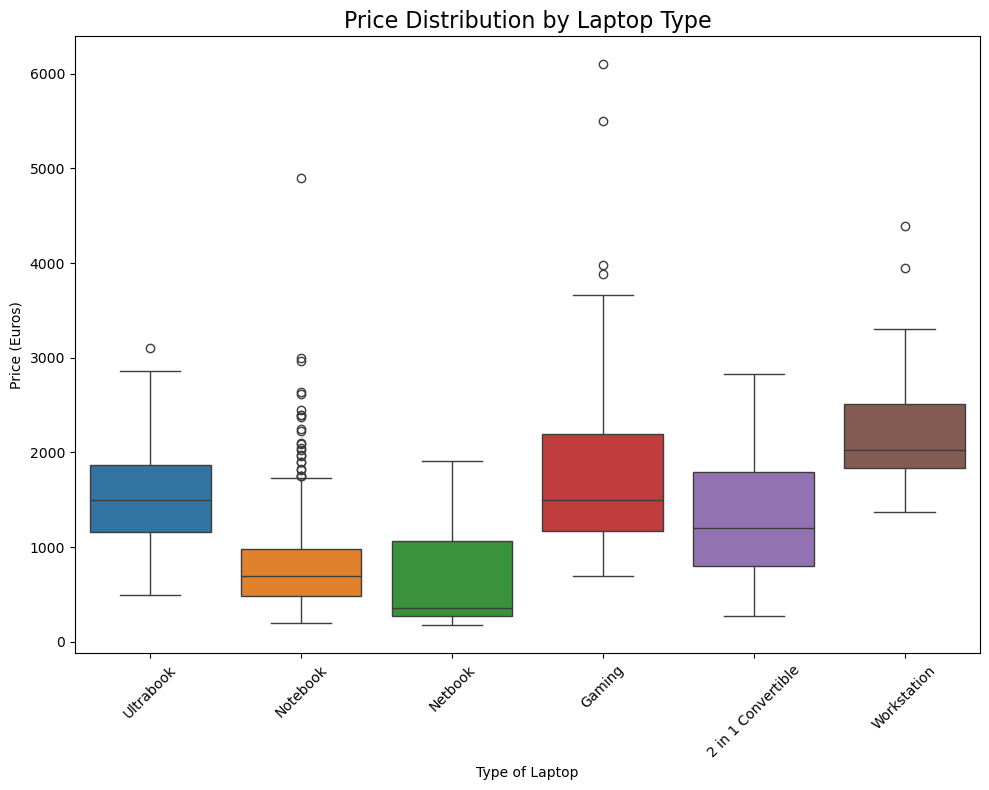

In [174]:
plt.figure(figsize=(10, 8))
sns.boxplot(data=df, x='TypeName', y='Price_euros', hue='TypeName', legend=False)
plt.title("Price Distribution by Laptop Type", fontsize=16)
plt.xlabel("Type of Laptop")
plt.ylabel("Price (Euros)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


### 4. Câu hỏi 4 (bonus) <a id="iv4"></a>

## Tài liệu tham khảo  <a id="tltk"></a>